# **Problem 1**

In [ ]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 11.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


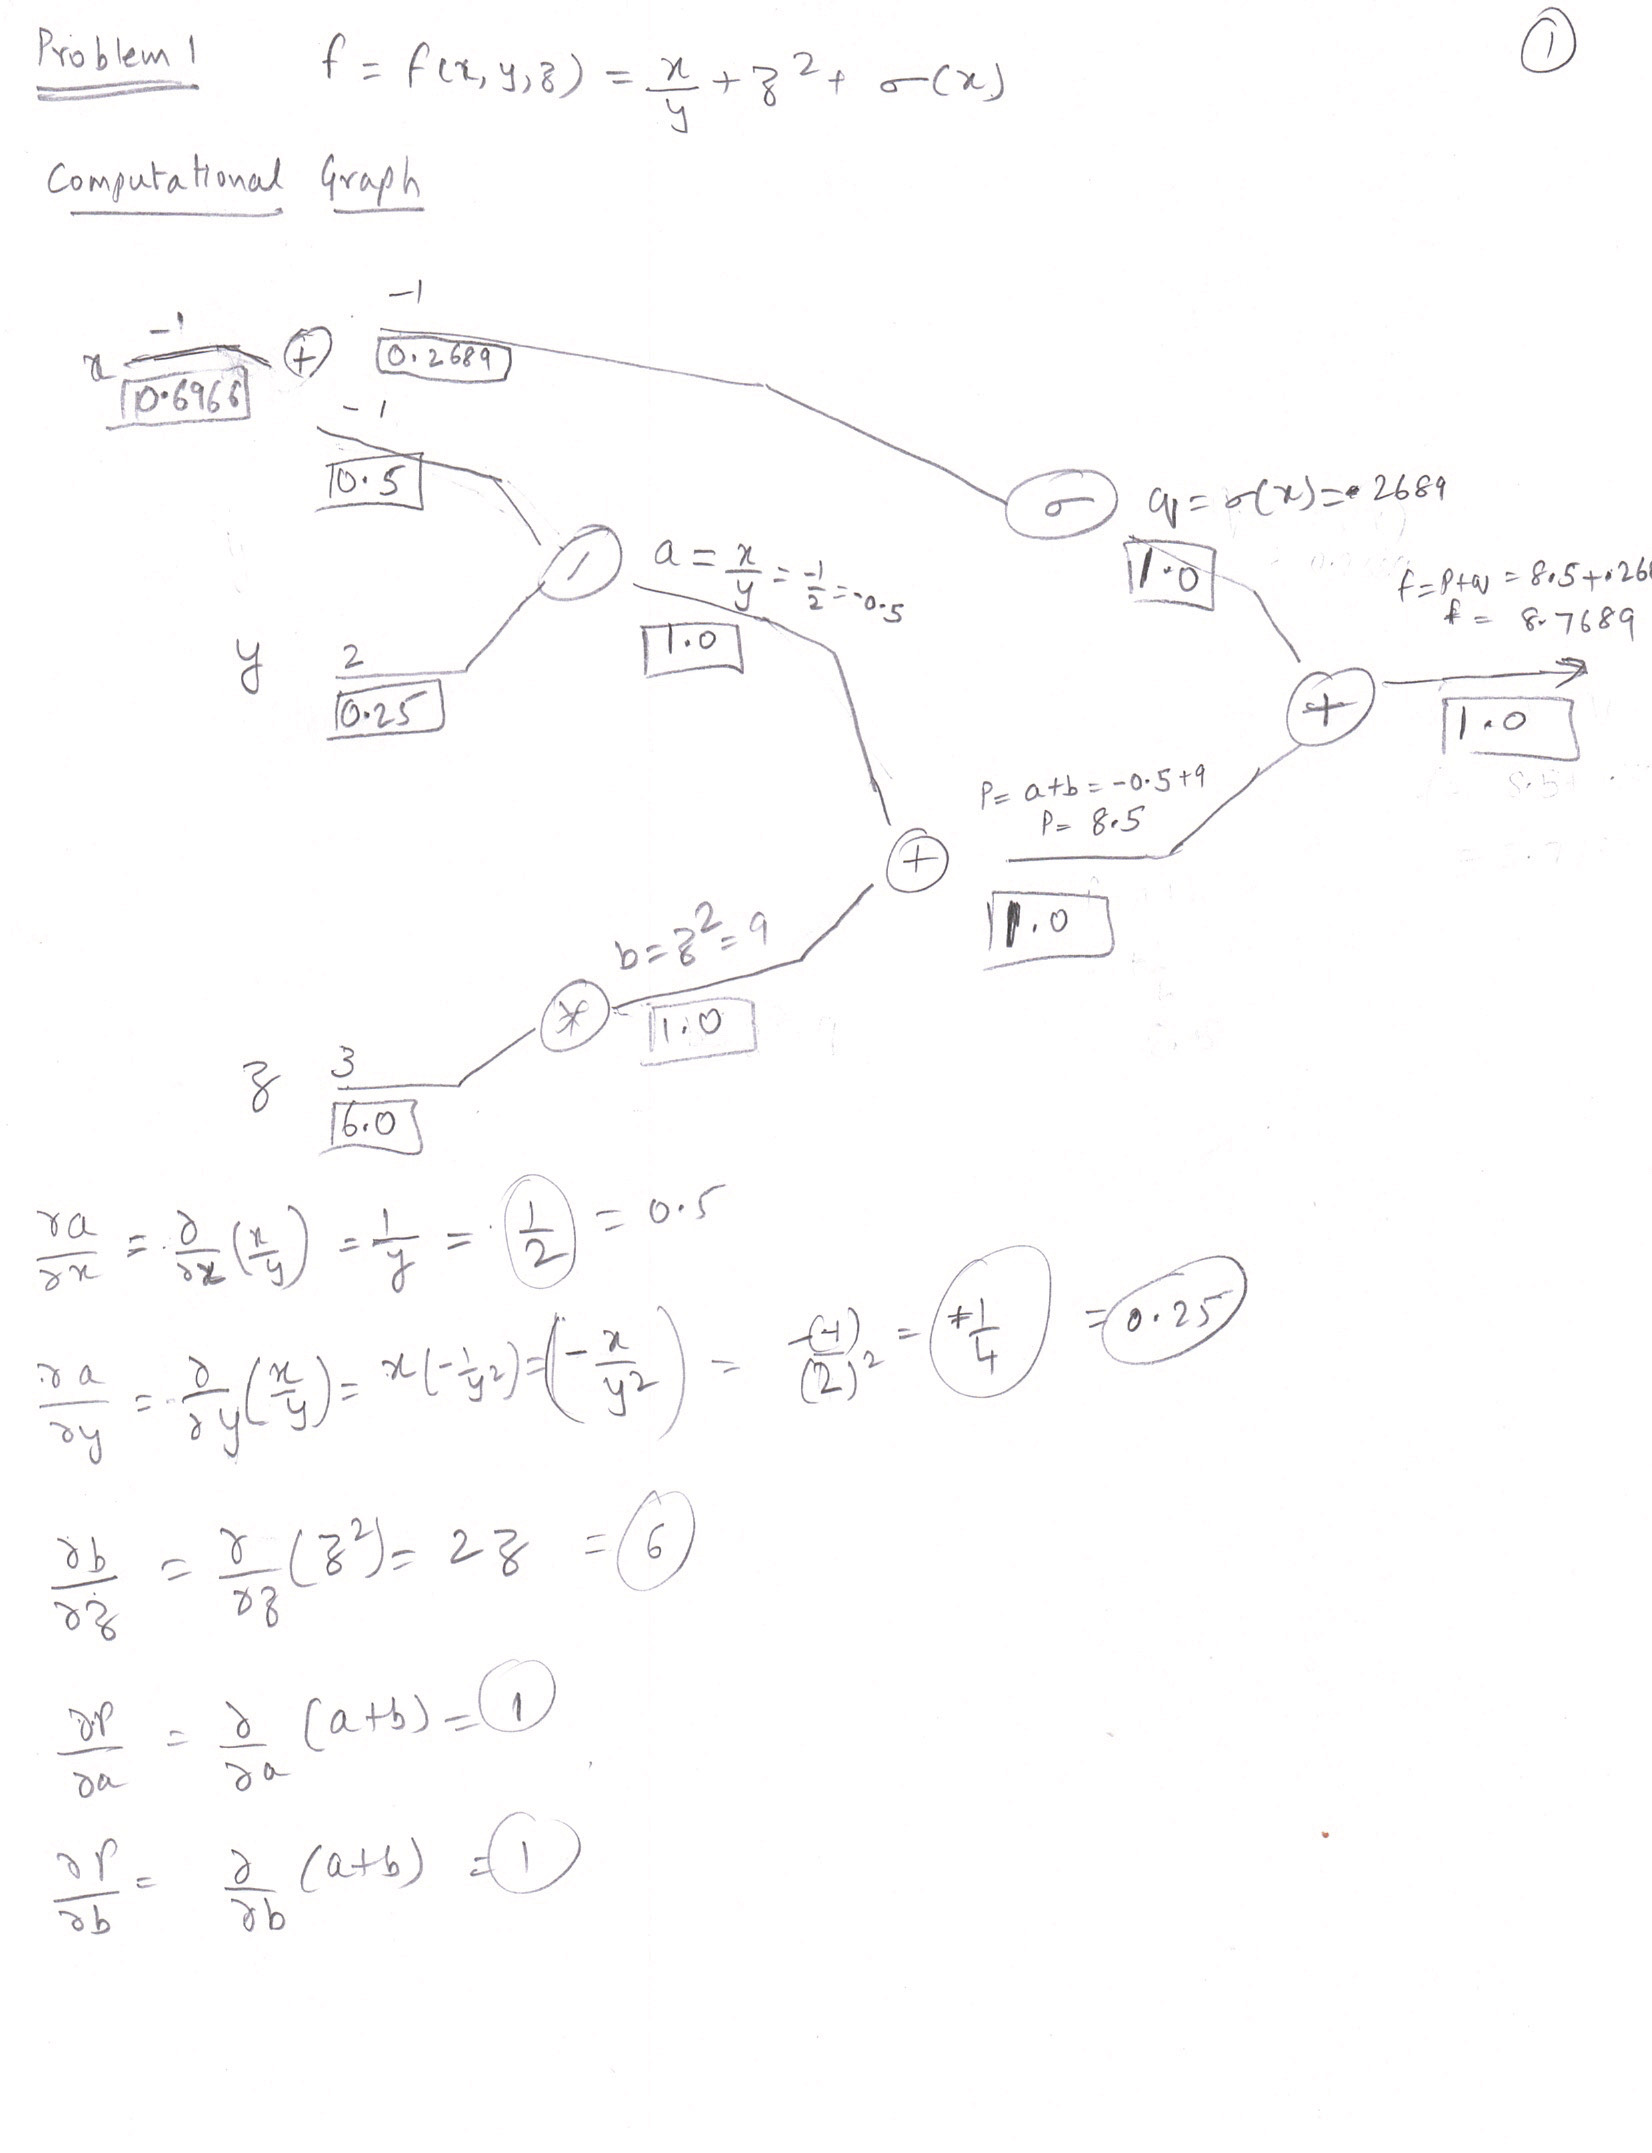

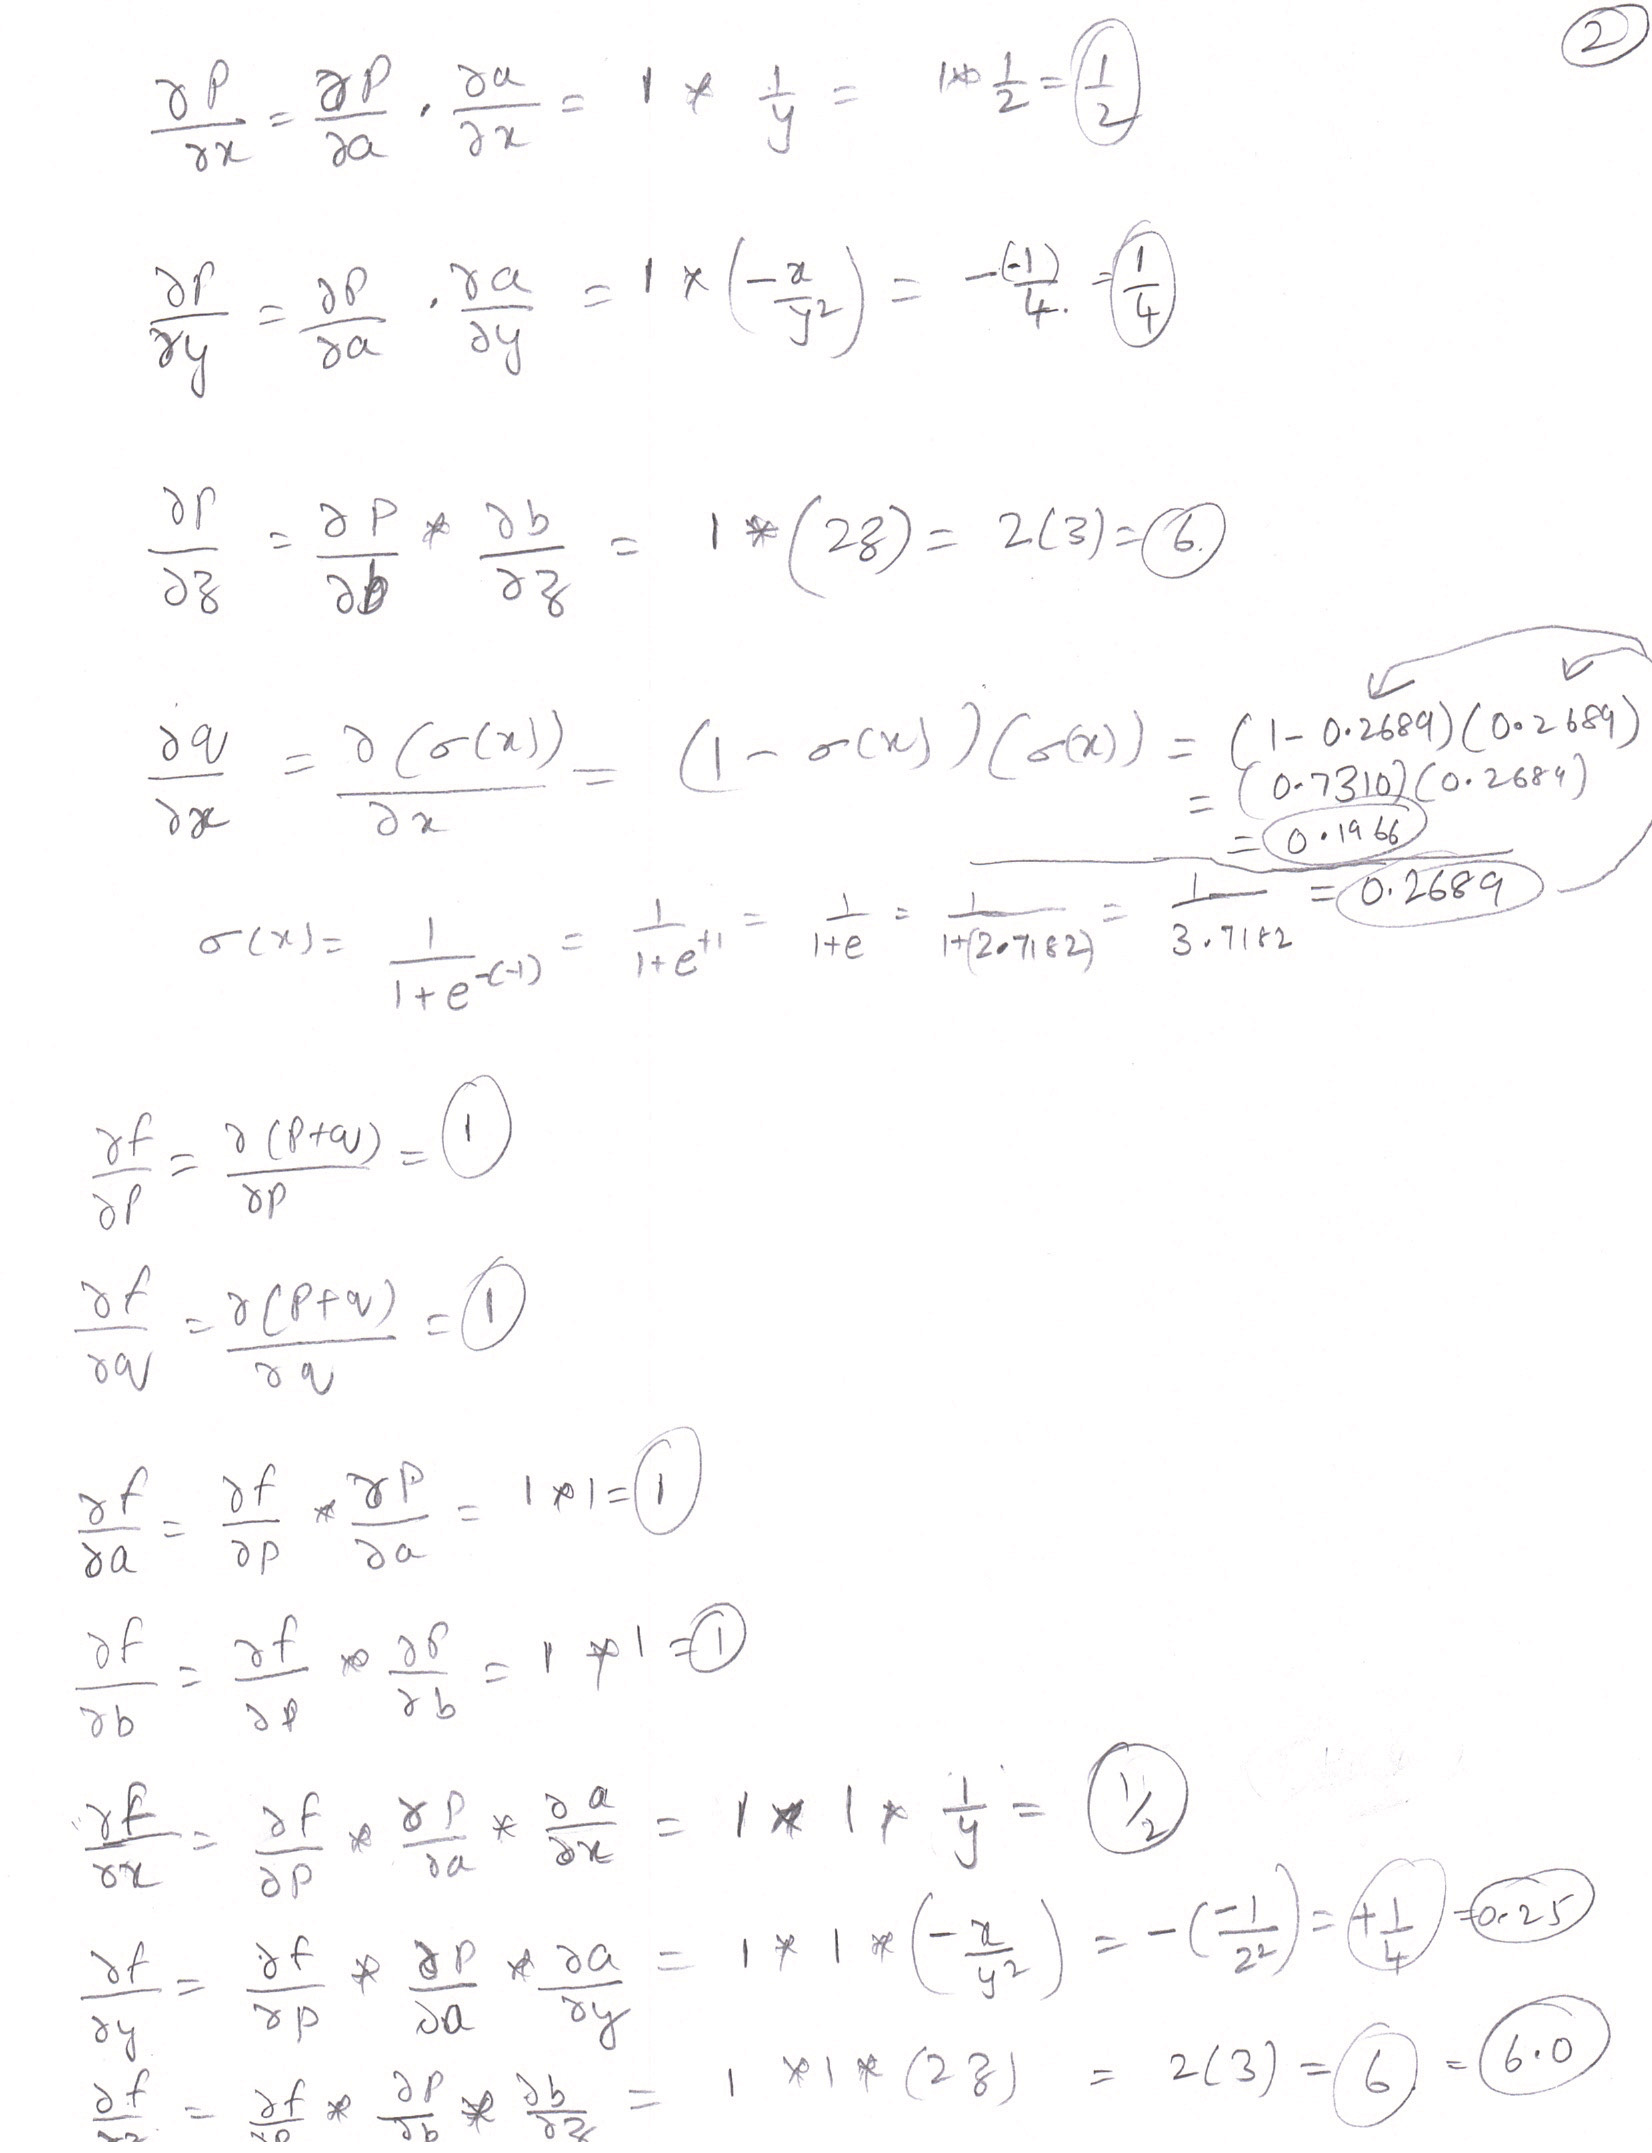

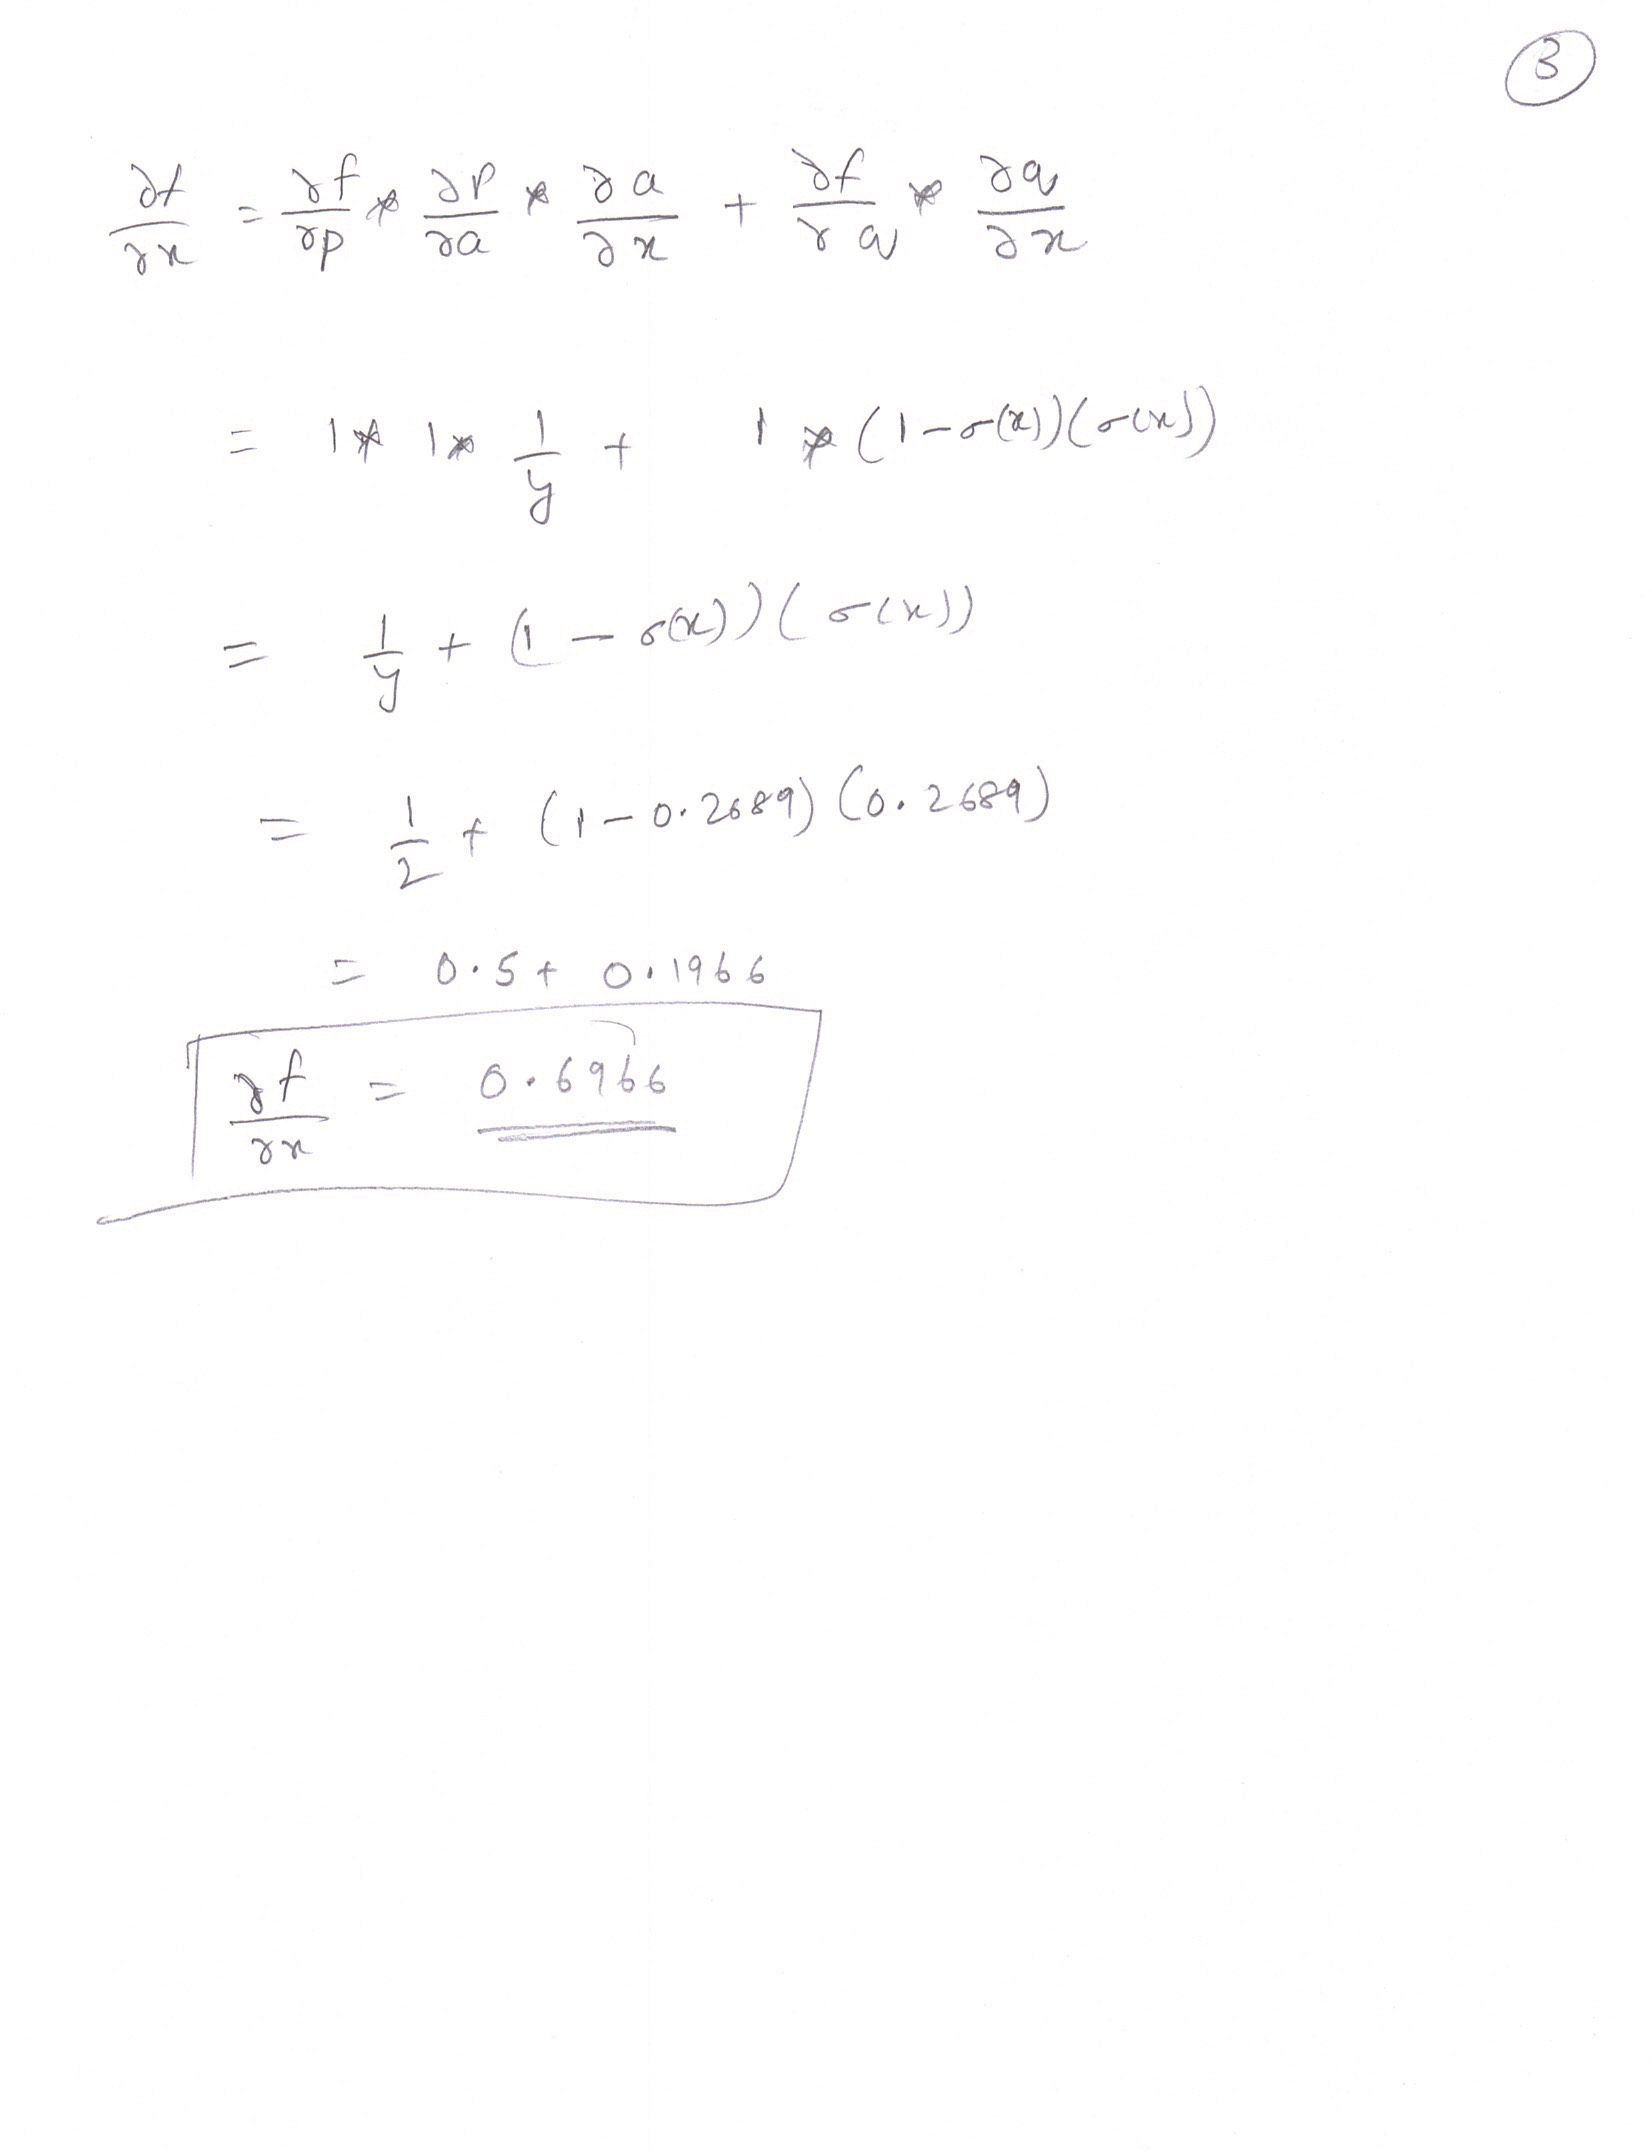

# **Problem 2**

In [2]:
import tensorflow as tf
import numpy as np

In [8]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [418]:
# persistent
x = tf.Variable (-1.0 )
y = tf.Variable (2.0 )
z = tf.Variable (3.0 )
#s = tf.Variable(tf.cast(np.exp(-(-1.0)), dtype =tf.float64))
s = tf.Variable(np.exp(-x))
#s =  tf.cast(s, dtype=tf.double)

with tf.GradientTape(persistent=True) as tape:
  #tape.watch(s)
  #f = x/y + z**2 + (1 / (1 + np.exp(-x)))
  f = x/y + z**2 + (1 / (1 + s))
  #f =  1 / (1 + s)

df_dx = tape.gradient(f, x)
df_dy = tape.gradient(f, y)
df_dz = tape.gradient(f, z)


del tape
print(df_dx)
print(df_dy)
print(df_dz)

tf.Tensor(0.5, shape=(), dtype=float32)
tf.Tensor(0.25, shape=(), dtype=float32)
tf.Tensor(6.0, shape=(), dtype=float32)


**Observations from comparing tf.GradientTape() results vs Computation Graph's calculated results:**
The df_dy and df_dz are the same with the corresponding calculations done using the computational graph.

However, the df_dx is 0.5 versus the computational graph value is 0.6966. It could be because Gradient Tape does not take double values as it was error out.


### **Problem 3**

In [476]:
import tensorflow as tf
import numpy as np
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)

In [477]:
print(negative_samples[0])
#print()
#rint(negative_samples)
#print()
#print(positive_samples)


[-0.3552284   3.89916452]


In [478]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [479]:
print(inputs)

[[-0.3552284   3.8991644 ]
 [ 1.6596699   5.001996  ]
 [-0.11456967  5.266331  ]
 ...
 [ 2.4284272   0.97675437]
 [ 1.397858    0.425184  ]
 [ 2.8600636   1.1692898 ]]


In [480]:
print(inputs)
print(inputs[:,0])
print(inputs[:,1])
inputs.shape

[[-0.3552284   3.8991644 ]
 [ 1.6596699   5.001996  ]
 [-0.11456967  5.266331  ]
 ...
 [ 2.4284272   0.97675437]
 [ 1.397858    0.425184  ]
 [ 2.8600636   1.1692898 ]]
[-0.3552284   1.6596699  -0.11456967 ...  2.4284272   1.397858
  2.8600636 ]
[3.8991644  5.001996   5.266331   ... 0.97675437 0.425184   1.1692898 ]


(2000, 2)

In [481]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

In [482]:
print(targets)
targets.shape

[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


(2000, 1)

In [483]:
from matplotlib.colors import LinearSegmentedColormap


cGR = LinearSegmentedColormap(
    'GreenRed',
    {
        'red':  ((0.0, 0.0, 0.0),
                (0.5, 1.0, 1.0),
                (1.0, 1.0, 1.0)),
        'green':((0.0, 1.0, 1.0),
                (0.5, 1.0, 1.0),
                ( 1.0, 0.0, 0.0)),
        'blue': ((0.0, 0.0, 0.0),
                (0.5, 1.0, 1.0),
                (1.0, 0.0, 0.0))
    },)


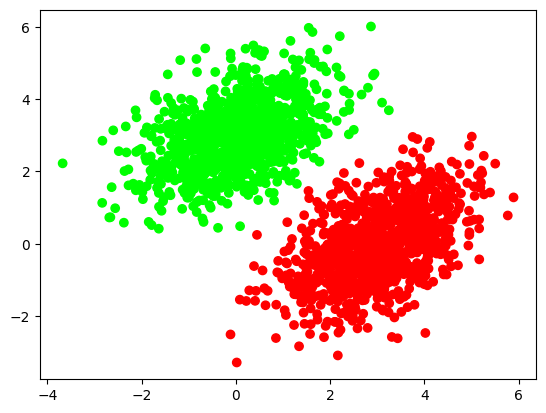

In [484]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[ :, 0], cmap=cGR )
plt.show()

**Creating the linear classifier variables**

In [485]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [486]:
print("W")
print(W.numpy())
print("b")
print(b.numpy())

W
[[0.42059684]
 [0.46048033]]
b
[0.]


**The Forward Pass Function**

In [487]:
def model(inputs):
    #print("model: ", tf.matmul(inputs, W) + b)
    return tf.matmul(inputs, W) + b

**The mean squared error loss function**

In [488]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

**The training step function**

In [489]:
learning_rate = 0.1

def training_step(inputs, targets):
    #print(inputs [0:3])
    #print(targets[0:4])

    with tf.GradientTape() as tape:
        predictions = model(inputs)
        #print("predictions: ",predictions)
        loss = square_loss(predictions, targets)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**The batch training loop**

In [490]:
print(W[0])
print(inputs[0,0])
print(W[1])
print(inputs[0,1])
print(b)
print()
W[0]*inputs[0,0]+W[1]*inputs[0,1]+b

tf.Tensor([0.42059684], shape=(1,), dtype=float32)
-0.3552284
tf.Tensor([0.46048033], shape=(1,), dtype=float32)
3.8991644
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>



<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.6460806], dtype=float32)>

In [491]:
print(W[0])
print(inputs[1,0])
print(W[1])
print(inputs[1,1])
print(b)
print()
W[0]*inputs[1,0]+W[1]*inputs[1,1]+b

tf.Tensor([0.42059684], shape=(1,), dtype=float32)
1.6596699
tf.Tensor([0.46048033], shape=(1,), dtype=float32)
5.001996
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>



<tf.Tensor: shape=(1,), dtype=float32, numpy=array([3.0013728], dtype=float32)>

In [492]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 1.5997
Loss at step 1: 0.2793
Loss at step 2: 0.1305
Loss at step 3: 0.1046
Loss at step 4: 0.0957
Loss at step 5: 0.0896
Loss at step 6: 0.0842
Loss at step 7: 0.0794
Loss at step 8: 0.0749
Loss at step 9: 0.0708
Loss at step 10: 0.0671
Loss at step 11: 0.0636
Loss at step 12: 0.0605
Loss at step 13: 0.0576
Loss at step 14: 0.0549
Loss at step 15: 0.0525
Loss at step 16: 0.0503
Loss at step 17: 0.0482
Loss at step 18: 0.0464
Loss at step 19: 0.0447
Loss at step 20: 0.0431
Loss at step 21: 0.0416
Loss at step 22: 0.0403
Loss at step 23: 0.0391
Loss at step 24: 0.0380
Loss at step 25: 0.0370
Loss at step 26: 0.0361
Loss at step 27: 0.0352
Loss at step 28: 0.0344
Loss at step 29: 0.0337
Loss at step 30: 0.0331
Loss at step 31: 0.0325
Loss at step 32: 0.0319
Loss at step 33: 0.0314
Loss at step 34: 0.0309
Loss at step 35: 0.0305
Loss at step 36: 0.0301
Loss at step 37: 0.0298
Loss at step 38: 0.0294
Loss at step 39: 0.0291


Predictions

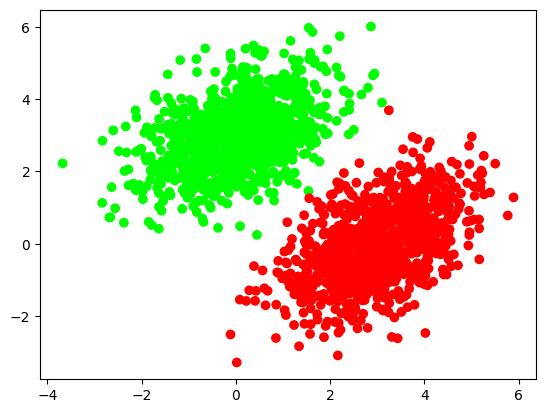

In [493]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5, cmap=cGR)
plt.show()

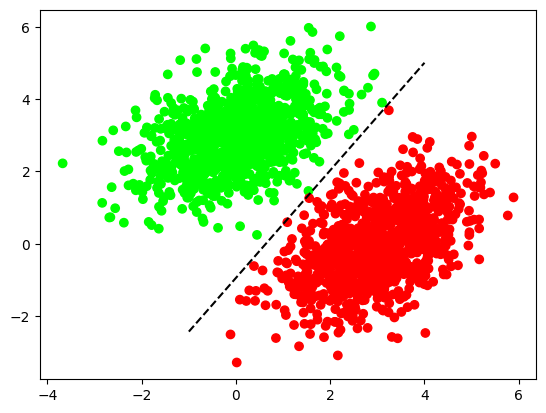

In [495]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "--k")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5, cmap=cGR)

# **Problem 4**

x:  tf.Tensor([0.         0.05025126], shape=(2,), dtype=float32)
noise: 
[-0.01838998 -0.29267013]
y1:  tf.Tensor([-1.0183899 -1.287645 ], shape=(2,), dtype=float32)

y:  tf.Tensor([-1.0183899 -1.287645 ], shape=(2,), dtype=float32)



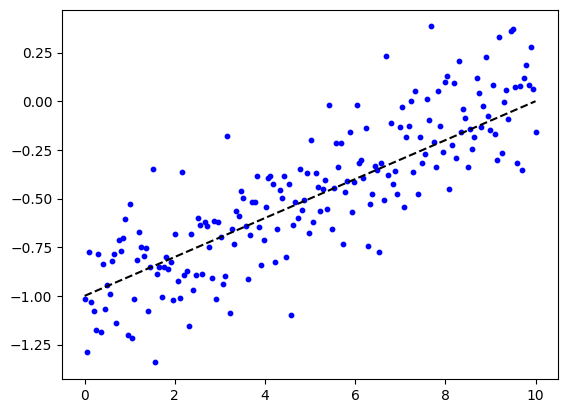

In [452]:
np.random.seed(22)
num_points=tf.constant(200)
x = tf.constant(np.linspace(0, 10, num_points),dtype=tf.float32)
print("x: ",x[:2])
y1 = 0.1 * x - 1
#print(y)
plt.plot(x, y1, '--k')
print("noise: ")
noise=np.random.normal(0.0, 0.2, size = x.shape)
print(noise[:2])
y1 = tf.Variable(0.1*x - 1 + tf.constant(noise,dtype=tf.float32), dtype=tf.float32)
print("y1: ", y1[:2])
#y=tf.cast(y1, dtype=tf.double)
y=y1
print()
print("y: ", y[:2])
print()
plt.scatter(x,y, s=10, color='blue')
plt.show()

In [453]:
inputs1= tf.stack([x,y])
inputs2= tf.transpose(inputs1)
#inputs2=tf.cast(tf.transpose(inputs1),dtype=tf.double)

print(x[:2])
print()
print(y[:2])
print (inputs2[:2])

tf.Tensor([0.         0.05025126], shape=(2,), dtype=float32)

tf.Tensor([-1.0183899 -1.287645 ], shape=(2,), dtype=float32)
tf.Tensor(
[[ 0.         -1.0183899 ]
 [ 0.05025126 -1.287645  ]], shape=(2, 2), dtype=float32)


x:  tf.Tensor([0.         0.05025126], shape=(2,), dtype=float32)
y2:  tf.Tensor([-1.         -0.99497485], shape=(2,), dtype=float32)



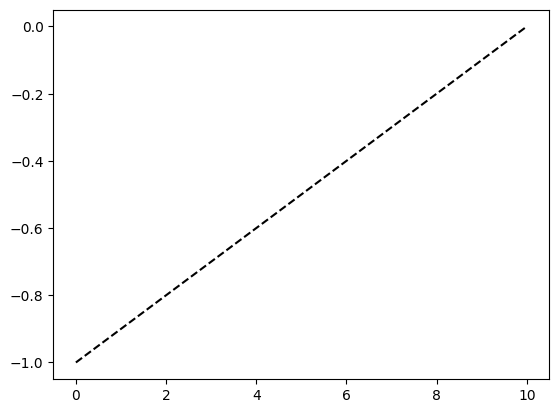

tf.Tensor(
[[ 0.         -1.        ]
 [ 0.05025126 -0.99497485]], shape=(2, 2), dtype=float32)


In [455]:
x = tf.constant(np.linspace(0, 10, num_points),dtype=tf.float32)
print("x: ",x [0:2])
y2 = tf.Variable(0.1 * x - 1)
#print(y)
plt.plot(x, y2, '--k')


print("y2: ", y2[0:2])
print()

plt.show()

targets1= tf.stack([x,y2])
targets2=tf.transpose(targets1)
print(targets2 [:2])

In [456]:
input_dim = 2
output_dim= 1
W1 =tf.Variable(initial_value=tf.random.uniform(shape=(input_dim,output_dim)))
b1 =tf.Variable(initial_value=tf.zeros(output_dim))

print("W1")
print(W1.numpy())
print("b1")
print(b1.numpy())

W1
[[0.65764034]
 [0.2886734 ]]
b1
[0.]


In [457]:
def model(inputs2):
  return tf.matmul(inputs2, W1) + b1

In [458]:
def square_loss(targets2, predictions2):
    per_sample_losses = tf.square(targets2 - predictions2)
    return tf.reduce_mean(per_sample_losses)

In [459]:
learning_rate = 0.1

def training_step2(inputs2, targets2):

    with tf.GradientTape() as tape:
        predictions2 = model(inputs2)
        predictions3= model (targets2)
        loss = square_loss( predictions2,predictions3)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W1, b1])
    W1.assign_sub(grad_loss_wrt_W * learning_rate)
    b1.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [460]:
print(W1[0])
print(inputs2[0,0])
print(W1[1])
print(inputs2[0,1])
print(b1)
print()
W1[0]*inputs2[0,0]+W1[1]*inputs2[0,1]+b1

tf.Tensor([0.65764034], shape=(1,), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor([0.2886734], shape=(1,), dtype=float32)
tf.Tensor(-1.0183899, shape=(), dtype=float32)
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>



<tf.Tensor: shape=(1,), dtype=float32, numpy=array([-0.2939821], dtype=float32)>

In [461]:
for step in range(40):
    loss2 = training_step2(inputs2, targets2)
    print(f"Loss at step {step}: {loss2:.4f}")
    print("")

Loss at step 0: 0.0035

Loss at step 1: 0.0034

Loss at step 2: 0.0034

Loss at step 3: 0.0033

Loss at step 4: 0.0033

Loss at step 5: 0.0032

Loss at step 6: 0.0032

Loss at step 7: 0.0031

Loss at step 8: 0.0031

Loss at step 9: 0.0030

Loss at step 10: 0.0030

Loss at step 11: 0.0029

Loss at step 12: 0.0029

Loss at step 13: 0.0028

Loss at step 14: 0.0028

Loss at step 15: 0.0027

Loss at step 16: 0.0027

Loss at step 17: 0.0026

Loss at step 18: 0.0026

Loss at step 19: 0.0025

Loss at step 20: 0.0025

Loss at step 21: 0.0025

Loss at step 22: 0.0024

Loss at step 23: 0.0024

Loss at step 24: 0.0023

Loss at step 25: 0.0023

Loss at step 26: 0.0023

Loss at step 27: 0.0022

Loss at step 28: 0.0022

Loss at step 29: 0.0021

Loss at step 30: 0.0021

Loss at step 31: 0.0021

Loss at step 32: 0.0020

Loss at step 33: 0.0020

Loss at step 34: 0.0020

Loss at step 35: 0.0019

Loss at step 36: 0.0019

Loss at step 37: 0.0019

Loss at step 38: 0.0018

Loss at step 39: 0.0018



In [462]:
print(W1)
print(b1)

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.65764034],
       [0.20592621]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


**Prediction**

[0.         0.05025126]


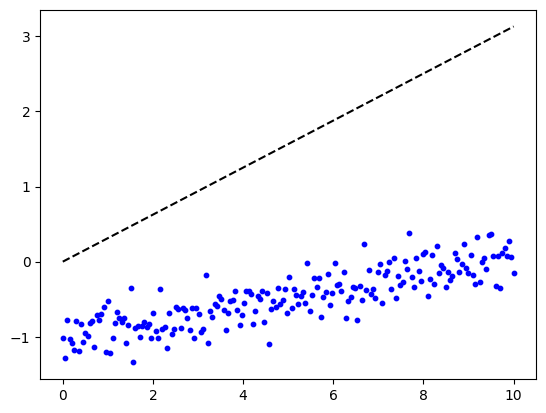

In [471]:
num_points=tf.constant(200)
x4 = np.linspace(0, 10, num_points)
print(x4[0:2])

y4 =  W1[1] /  W1[0] * x4 + (b1)

plt.plot(x4, y4, "--k")

plt.scatter(x,y, s=10, color='blue')
plt.show()